# S07 T01: Tasca del test d'hipòtesis
Descripció
Aprèn a realitzar test d'hipòtesis amb Python.

## NIVELL 1
### Exercici 1
Agafa un conjunt de dades de tema esportiu que t'agradi i selecciona un atribut del conjunt de dades. Calcula el p-valor i digues si rebutja la hipòtesi nul·la agafant un alfa de 5%. 



Per a realitzar aquest sprint utilitzo el mateix conjunt de dades que els sprints 5 i 6, relacionat amb les jugadores del mundial de futbol femení 2019.

In [1]:
# Crido a les llibreries que necessito
# Faig entrar l'arxiu CSV gràcies a pandas

import pandas as pd
import numpy as np
import random
import matplotlib.pyplot as plt
import seaborn as sns
import imblearn

women = pd.read_csv("C:\\Users\\Anna\DataScience\\SPRINTS\\SPRINT 5\\Womens Squads.csv", encoding = "ISO-8859-1", engine='python', sep=";")

display(women)

,Squad no.,Country,Pos.,Player,DOB,Age,Caps,Goals,Club
0,1,US,GK,Alyssa Naeher,20-abr-88,31,43.0,0.0,Chicago Red Stars
1,2,US,FW,Mallory Pugh,29-abr-98,21,50.0,15.0,Washington Spirit
2,3,US,MF,Sam Mewis,09-oct-92,26,47.0,9.0,North Carolina Courage
3,4,US,DF,Becky Sauerbrunn,06-jun-85,34,155.0,0.0,Utah Royals
4,5,US,DF,Kelley O'Hara,04-ago-88,30,115.0,2.0,Utah Royals
...,...,...,...,...,...,...,...,...,...
547,19,France,DF,Griedge Mbock Bathy,26-feb-95,24,49.0,4.0,Lyon
548,20,France,FW,Delphine Cascarino,05-feb-97,22,11.0,1.0,Lyon
549,21,France,GK,Pauline Peyraud-Magnin,17-mar-92,27,1.0,0.0,Arsenal
550,22,France,DF,Julie Debever,18-abr-88,31,2.0,0.0,Guingamp


Abans de començar a fer l'exercici, faig una mica d'estudi de les dades

In [2]:
women.count()

Squad no.    552
Country      552
Pos.         552
Player       552
DOB          552
Age          552
Caps         520
Goals        520
Club         552
dtype: int64

In [3]:
# Com que en l'anterior punt veiem que les columnes "Caps" i "Goals" tenen menys quantitat de dades que la resta de columnes, em fa sospitar que hi ha nuls en aquest dataset, per tant ho comprovo

print(women.isnull())

print("____________________________________________________________________________")

print(women.count())

print("____________________________________________________________________________")

print(women.isnull().sum())

     Squad no.  Country   Pos.  Player    DOB    Age   Caps  Goals   Club
0        False    False  False   False  False  False  False  False  False
1        False    False  False   False  False  False  False  False  False
2        False    False  False   False  False  False  False  False  False
3        False    False  False   False  False  False  False  False  False
4        False    False  False   False  False  False  False  False  False
..         ...      ...    ...     ...    ...    ...    ...    ...    ...
547      False    False  False   False  False  False  False  False  False
548      False    False  False   False  False  False  False  False  False
549      False    False  False   False  False  False  False  False  False
550      False    False  False   False  False  False  False  False  False
551      False    False  False   False  False  False  False  False  False

[552 rows x 9 columns]
____________________________________________________________________________
Squad no.  

In [4]:
# Eliminem les files que contenen algun valor nul i comprobem que s'han eliminat, de manera que totes les files tenen la mateixa mida ara.

women = women.dropna(subset=["Caps", "Goals"])

women.count()

Squad no.    520
Country      520
Pos.         520
Player       520
DOB          520
Age          520
Caps         520
Goals        520
Club         520
dtype: int64

In [5]:
women.describe()

,Squad no.,Age,Caps,Goals
count,520.000000,520.000000,520.000000,520.000000
mean,11.867308,26.178846,43.661538,7.348077
std,6.609365,3.996715,43.674846,15.541727
min,1.000000,16.000000,0.000000,0.000000
25%,6.000000,23.000000,11.750000,0.000000
50%,12.000000,26.000000,29.500000,1.500000
75%,18.000000,29.000000,62.000000,8.250000
max,23.000000,41.000000,282.000000,181.000000


Decideixo treballar amb l'atribut "Age" i procedeixo a calcular el P-value i mirar si es rebutja la hipòtesi nul·la amb una alfa del 5%

In [6]:
# Em quedo només amb la columna d'edats

edats = women.Age

display(edats)

0      31
1      21
2      26
3      34
4      30
       ..
547    24
548    22
549    27
550    31
551    26
Name: Age, Length: 520, dtype: int64

In [7]:
edats.describe()

count    520.000000
mean      26.178846
std        3.996715
min       16.000000
25%       23.000000
50%       26.000000
75%       29.000000
max       41.000000
Name: Age, dtype: float64

In [8]:
# Agafo una mostra al·leatòria de 50 edats de la base de dades que tinc

mostraEdats = edats.sample(n=50)
print(mostraEdats)

17     33
209    31
330    27
184    27
418    29
113    25
447    29
440    28
70     25
435    28
264    29
78     25
172    28
420    21
112    28
131    26
241    27
413    18
198    25
510    36
543    33
2      26
382    30
286    22
16     31
404    22
79     28
409    25
515    31
223    21
191    28
538    26
207    26
267    30
328    26
178    27
46     36
194    27
0      31
523    24
488    29
154    21
199    29
297    22
208    30
142    23
236    25
509    27
500    19
23     29
Name: Age, dtype: int64


In [9]:
# En faig la descprició per veure les caracterísitques bàsiques

mostraEdats.describe()

count    50.000000
mean     26.980000
std       3.878197
min      18.000000
25%      25.000000
50%      27.000000
75%      29.000000
max      36.000000
Name: Age, dtype: float64

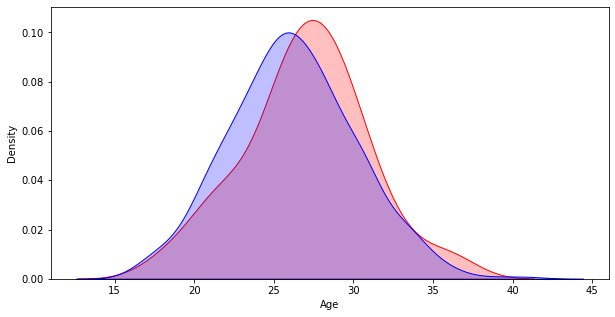

In [10]:
#Faig un gràfic amb la totalitat de les edats del dataset i amb la mostra per veure una mica com s'assemblen

plt.figure(figsize=(10,5))
fig = sns.kdeplot(mostraEdats, shade=True, color="r")
fig = sns.kdeplot(women['Age'], shade=True, color="b")
plt.show()

Estableixo hipòtesi nul·la i hipòtesi alternativa

En aquest cas, la hipòtesi nul·la és el fet acceptat, és a dir, que la mitjana d'edat de les jugadores de futbol femení que juguen a la selecció és de 26,179:

Ho: μ = 26,179

I com a hipòtesi alternativa, direm que la mitjana d'edat de les jugadores és diferent a 26,179:

H1: μ ≠ 26,179

In [11]:
# Importo les llibreries necessàries per a realitzar els càlculs que vull fer
import scipy
from scipy import stats

# Calculo la T i el P-Value de la mostra de les edats
scipy.stats.ttest_ind(mostraEdats, women["Age"])


Ttest_indResult(statistic=1.3572481561183973, pvalue=0.175241424014794)

El P-value per a una prova de dues cues és sempre dues vegades el P-value per a qualsevol de les proves d'una cua, per tant, hem el P-value d'aquesta prova l'hem de multiplicar per dos.

Com que la mostra que hem agafat és de tamany 50, el nostre grau de llibertat és de n-1, per tant és de 49, i amb una alfa de 5%, quan mirem a la T.-table student, el valor que ens dona és 1.6766 (i de -1.6766 per la cua esquerre).

El valor de T* és 1.3572, per tant es troba entre -1.6766 i 1.6766, o dit d'una altra manera, no és menor a -1.6766 ni major a 1.6766, per tant, no es rebutja la hipòtesi nul·la i descartem la hipòtesi alternativa.



## NIVELL 2
### Exercici 2
Continua amb el conjunt de dades de tema esportiu que t'agradi i selecciona dos altres atributs del conjunt de dades. Calcula els p-valors i digues si rebutgen la hipòtesi nul·la agafant un alfa de 5%.




Per realitzar aquest exercici utilitzaré els atributs "Goals" i "Caps" (número de partits jugats amb la selecció). Primer de tot estudio cada atribut per separat i després aplicaré el Student's t-test, que em permet comparar les dues variables.

In [12]:
# Em quedo només amb les columnes que vull

gols = women.Goals
partits = women.Caps
display(gols)
display(partits)

0       0.0
1      15.0
2       9.0
3       0.0
4       2.0
       ... 
547     4.0
548     1.0
549     0.0
550     0.0
551     0.0
Name: Goals, Length: 520, dtype: float64

0       43.0
1       50.0
2       47.0
3      155.0
4      115.0
       ...  
547     49.0
548     11.0
549      1.0
550      2.0
551      3.0
Name: Caps, Length: 520, dtype: float64

In [13]:
gols.describe()

count    520.000000
mean       7.348077
std       15.541727
min        0.000000
25%        0.000000
50%        1.500000
75%        8.250000
max      181.000000
Name: Goals, dtype: float64

In [14]:
partits.describe()

count    520.000000
mean      43.661538
std       43.674846
min        0.000000
25%       11.750000
50%       29.500000
75%       62.000000
max      282.000000
Name: Caps, dtype: float64

In [15]:
# Agafo una mostra al·leatòria de 50 valors de cada atribut

mostraGols = gols.sample(n=50)
mostraPartits = partits.sample(n=50)
print(mostraGols)
print(mostraPartits)

310     0.0
544     0.0
209     5.0
261     5.0
551     0.0
444     1.0
278     0.0
53      3.0
389     1.0
470    21.0
84      0.0
110     1.0
413     0.0
91      0.0
263    10.0
277     1.0
70      1.0
466    14.0
404     0.0
47      0.0
193     3.0
83      0.0
238    17.0
13      0.0
107     1.0
267     7.0
89      0.0
220     6.0
338    10.0
138     0.0
249    32.0
365     1.0
212     0.0
64      1.0
348     9.0
500     0.0
383     0.0
19      6.0
317     3.0
499     9.0
319     6.0
396    18.0
315     0.0
75     12.0
7      18.0
56     10.0
377    27.0
224     0.0
540     0.0
408     0.0
Name: Goals, dtype: float64
106      6.0
57       0.0
124     88.0
117     55.0
254     36.0
49      21.0
381     53.0
405    104.0
400     42.0
432      1.0
348    116.0
186     18.0
87      15.0
25      11.0
309     48.0
496     15.0
76      20.0
318      8.0
360     34.0
285     12.0
295      2.0
272      1.0
221     24.0
395    166.0
235     26.0
484     59.0
151     13.0
226     40.0
409     

In [16]:
# En faig la descprició per veure les caracterísitques bàsiques

mostraGols.describe()

count    50.000000
mean      5.180000
std       7.604215
min       0.000000
25%       0.000000
50%       1.000000
75%       8.500000
max      32.000000
Name: Goals, dtype: float64

In [17]:
# En faig la descprició per veure les caracterísitques bàsiques

mostraPartits.describe()

count     50.000000
mean      42.680000
std       40.688684
min        0.000000
25%       13.250000
50%       29.500000
75%       59.000000
max      166.000000
Name: Caps, dtype: float64

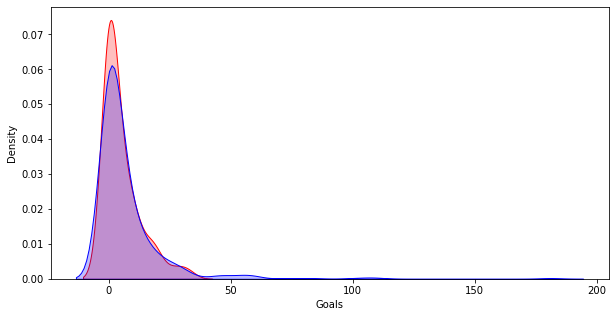

In [18]:
#Faig un gràfic amb la totalitat dels gols fets del dataset i amb la mostra per veure una mica com s'assemblen

plt.figure(figsize=(10,5))
fig = sns.kdeplot(mostraGols, shade=True, color="r")
fig = sns.kdeplot(women['Goals'], shade=True, color="b")
plt.show()

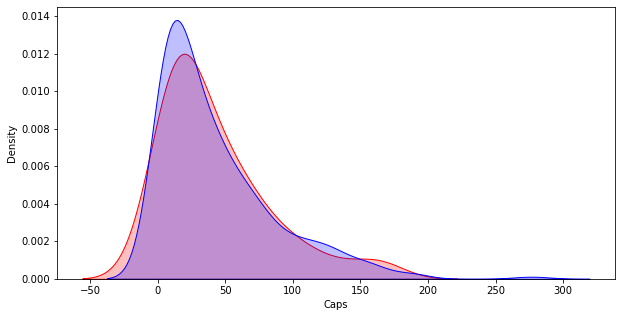

In [19]:
#Faig un gràfic amb la totalitat dels partits jugats del dataset i amb la mostra per veure una mica com s'assemblen

plt.figure(figsize=(10,5))
fig = sns.kdeplot(mostraPartits, shade=True, color="r")
fig = sns.kdeplot(women['Caps'], shade=True, color="b")
plt.show()

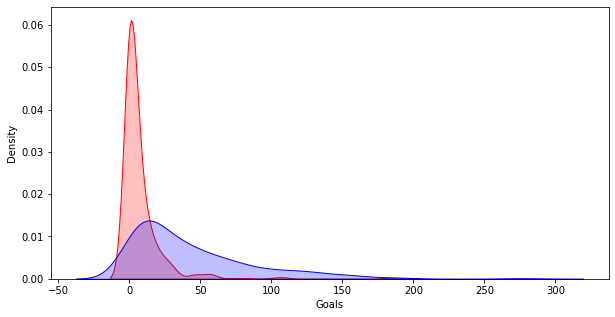

In [20]:
#Faig un gràfic amb la comparació dels dos datasets complerts

plt.figure(figsize=(10,5))
fig = sns.kdeplot(women['Goals'], shade=True, color="r")
fig = sns.kdeplot(women['Caps'], shade=True, color="b")
plt.show()

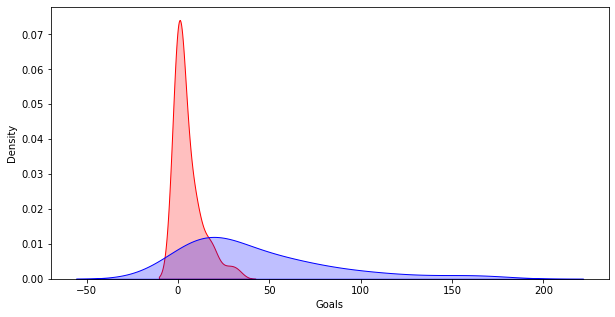

In [21]:
#Faig un gràfic amb la comparació de les dues mostres

plt.figure(figsize=(10,5))
fig = sns.kdeplot(mostraGols, shade=True, color="r")
fig = sns.kdeplot(mostraPartits, shade=True, color="b")
plt.show()

Estableixo hipòtesi nul·la i hipòtesi alternativa

En aquest cas, la hipòtesi nul·la és  que les mitjanes de les dues mostres són iguals:

Ho: μ mostraGols = μ mostraPartits

I com a hipòtesi alternativa, direm que les mitjanes de les dues mostres són diferents:

H1: μ mostraGols ≠ μ mostraPartits



Utilizaré el T-test perquè em permet comparar variables independents amb mostres bastant diferents

In [22]:
# Importo les llibreries necessàries  i realitzo els càlculs que vull fer
from scipy.stats import ttest_ind

stat,p = ttest_ind(mostraGols,mostraPartits)
print('stat=%.3f, p=%.3f' % (stat, p))
if p > 0.05:
    print('Probablement la mateixa distribució')
else:
    print('Probablement una distribució diferent')



stat=-6.406, p=0.000
Probablement una distribució diferent


En conclusió, el P-value és pràcticament nul, per tant és menor del 5% de la nostra alpha i per tant rebutgem la hipòtesis nul·la. 
En altres paraules, la relació entre partits jugats i gols fets no van gaire de la mà.



## NIVELL 3
### Exercici 3
Continua amb el conjunt de dades de tema esportiu que t'agradi i selecciona tres atributs del conjunt de dades. Calcula el p-valor i digues si rebutja la hipòtesi nul·la agafant un alfa de 5%.



No tinc prou atributs numèrics com per fer tot l'estudi anterior, així que utilizaré els tres que ja he fet servir, edat de les jugadores, gols fets i partits jugats.

En aquest cas utilizaré el test d'anàlisi de la variança (ANOVA) ja que em permet comparar les mitjanes de dues o més mostres diferents

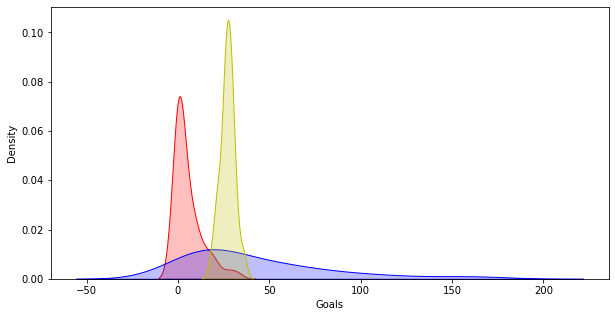

In [23]:
#Faig un gràfic amb la comparació de les tres mostres

plt.figure(figsize=(10,5))
fig = sns.kdeplot(mostraGols, shade=True, color="r")
fig = sns.kdeplot(mostraPartits, shade=True, color="b")
fig = sns.kdeplot(mostraEdats, shade=True, color="y")
plt.show()

In [24]:
# Importo les llibreries necessàries  i realitzo els càlculs que vull fer
from scipy.stats import f_oneway

stat,p = f_oneway(mostraEdats, mostraGols,mostraPartits)
print('stat=%.3f, p=%.3f' % (stat, p))
if p > 0.05:
    print('Probablement la mateixa distribució')
else:
    print('Probablement una distribució diferent')


stat=30.779, p=0.000
Probablement una distribució diferent


Ens torna a passar com l'exercici anterior, les mitjanes de les tres mostres són tant diferents que el P-Value ens dona inferior al 5%, per tant rebutgem la hipòtesi nul·la i acceptem l'alternativa